In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.models import Model
from keras import optimizers
import cv2
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#importing csv file 
df_train= pd.read_csv("mnist_train.csv")
y_train = np.array(df_train.iloc[:, 0])
x_train = np.array(df_train.iloc[:, 1:])

df_test= pd.read_csv("mnist_test.csv")
y_test = np.array(df_test.iloc[:, 0])
x_test = np.array(df_test.iloc[:, 1:])


In [3]:
x_features_train = x_train.shape[1]
x_samples_train = x_train.shape[0]
x_features_test = x_test.shape[1]
x_samples_test = x_test.shape[0]
print(x_features_train, x_samples_train, x_features_test, x_samples_test)
print(x_train.shape, y_train.shape, x_test.shape)

784 60000 784 10000
(60000, 784) (60000,) (10000, 784)


In [4]:
img_size = 28
threshold_color = 100 / 255

def img_demo(x):
    plt.figure(figsize=(8,7))
    if x.shape[0] > 100:
        print(x.shape[0])
        n_imgs = 16
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        for i in range(16):
            plt.subplot(4, 4, i+1) 
            plt.imshow(x[i],cmap = 'Greys')
        plt.show()
    else:
        plt.imshow(x)
        plt.show()
    

60000


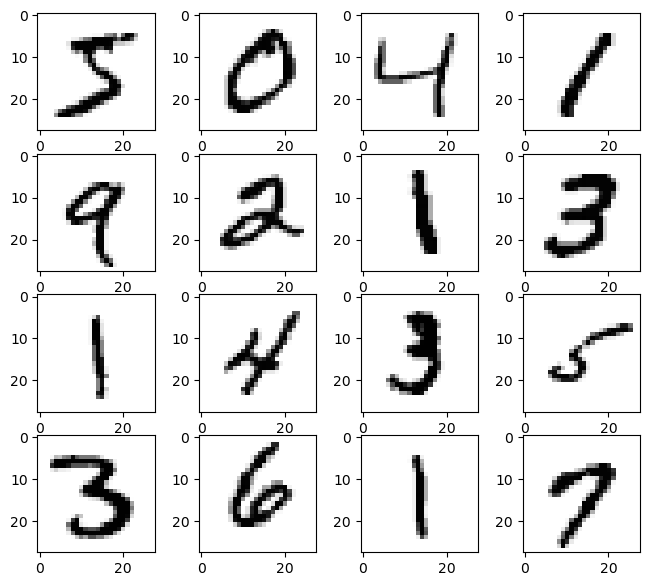

In [5]:
img_demo(x_train)

In [6]:
def greyscale(images):
    return np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
# Reshape x_train
x_train = x_train.reshape(-1, 28, 28, 1)

# to check if x_test has the same number of features as x_train
x_test = x_test.reshape(-1, 28, 28, 1)


print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [9]:
X_train1 = np.full((60000, 32, 32, 3), 0.0)

for i, s in enumerate(x_train):
#     mg = cv2.resize(X_train3[i], (32,32), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA)
    X_train1[i] = img

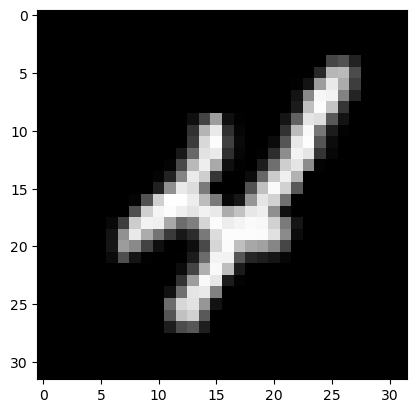

In [10]:
g = plt.imshow(X_train1[9])

In [11]:
X_test1 = np.full((10000, 32, 32, 3), 0.0)

for i, s in enumerate(x_test):
    img = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA)
    X_test1[i] = img

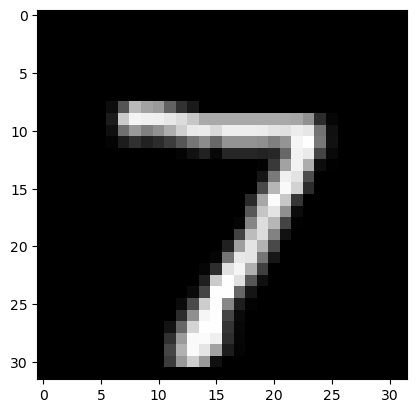

In [12]:
g = plt.imshow(X_test1[0])

In [13]:
Y_train1 = to_categorical(y_train, 10)
Y_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
# Define the LeNet-5 model
my_model = Sequential()

# Layer 1: Convolutional Layer
my_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3)))

# Layer 2: Average Pooling Layer
my_model.add(AveragePooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional Layer
my_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Layer 4: Average Pooling Layer
my_model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
my_model.add(Flatten())

# Layer 5: Fully Connected Layer
my_model.add(Dense(units=120, activation='relu'))

# Layer 6: Fully Connected Layer
my_model.add(Dense(units=84, activation='relu'))

# Output Layer
my_model.add(Dense(units=10, activation='softmax'))

# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
my_model.summary()


C:\Users\KHUSBHU KESHRI\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
%%time
# Train model
history = my_model.fit(X_train1, Y_train1,
              epochs=10,
              batch_size = 128,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/10
422/422 - 7s - 16ms/step - accuracy: 0.9071 - loss: 0.3236 - val_accuracy: 0.9730 - val_loss: 0.0944
Epoch 2/10
422/422 - 5s - 12ms/step - accuracy: 0.9702 - loss: 0.0965 - val_accuracy: 0.9803 - val_loss: 0.0665
Epoch 3/10
422/422 - 5s - 11ms/step - accuracy: 0.9794 - loss: 0.0670 - val_accuracy: 0.9830 - val_loss: 0.0616
Epoch 4/10
422/422 - 5s - 11ms/step - accuracy: 0.9841 - loss: 0.0528 - val_accuracy: 0.9855 - val_loss: 0.0509
Epoch 5/10
422/422 - 5s - 11ms/step - accuracy: 0.9859 - loss: 0.0436 - val_accuracy: 0.9850 - val_loss: 0.0546
Epoch 6/10
422/422 - 5s - 11ms/step - accuracy: 0.9884 - loss: 0.0371 - val_accuracy: 0.9873 - val_loss: 0.0466
Epoch 7/10
422/422 - 5s - 11ms/step - accuracy: 0.9897 - loss: 0.0315 - val_accuracy: 0.9892 - val_loss: 0.0433
Epoch 8/10
422/422 - 5s - 11ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9892 - val_loss: 0.0397
Epoch 9/10
422/422 - 4s - 11ms/step - accuracy: 0.9916 - loss: 0.0251 - val_accuracy: 0.9855 - val_loss:

In [16]:
test_predictions = my_model.predict(X_test1)
test_predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(10000, 10)

In [17]:
test_predictions[0]
np.argmax(test_predictions[0])

7

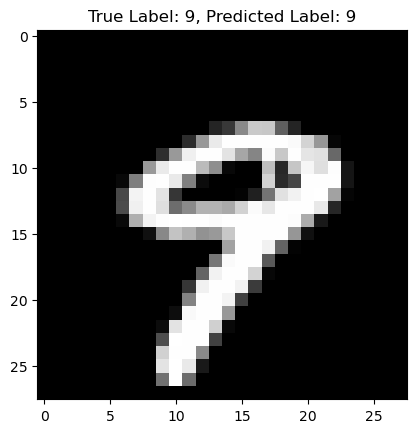

In [18]:
results = np.argmax(test_predictions,axis = 1)
results = pd.Series(results,name="Label")

image_index = 9

# Display the image
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {y_test[image_index]}, Predicted Label: {results[image_index]}")
plt.show()

In [19]:
import cv2
import numpy as np

# Resize MNIST images to match the model's input size (32x32)
x_test_resized = np.array([cv2.resize(img, (32, 32)) for img in x_test])

# check if x_test_resized has the same number of features as x_train
x_test_resized = x_test_resized.reshape(-1, 32, 32, 1)

# Convert to three-channel representation
x_test_resized_rgb = np.concatenate([x_test_resized] * 3, axis=-1)

# Print shapes for verification
print("x_test_resized_rgb shape:", x_test_resized_rgb.shape)

y_test_one_hot = to_categorical(y_test, num_classes=10)

# Evaluate the model with one-hot encoded labels
accuracy = my_model.evaluate(x_test_resized_rgb, y_test_one_hot)[1]
print('Accuracy of the model:', accuracy * 100)

x_test_resized_rgb shape: (10000, 32, 32, 3)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9858 - loss: 0.0430
Accuracy of the model: 98.9300012588501


In [20]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

submission.head()

,ImageId,Label
0,1,7.0
1,2,2.0
2,3,1.0
3,4,0.0
4,5,4.0
